<a href="https://colab.research.google.com/github/jokoeliyanto/Outlier-Detection-Using-K-Means-With-Various-Distance-Function/blob/main/K_Means_Clustering_OD1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Membuat Data Dengan Outlier

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline

In [39]:
y = np.random.random(100)
x = np.arange(len(y))

In [40]:
y

array([0.01595964, 0.2843838 , 0.21515512, 0.10112558, 0.89947351,
       0.91124242, 0.97502926, 0.30115814, 0.94383716, 0.82655422,
       0.28458338, 0.04781916, 0.88209261, 0.2289164 , 0.5858861 ,
       0.20561707, 0.12948355, 0.95108336, 0.47066261, 0.52897372,
       0.71816092, 0.98642056, 0.36507315, 0.77230867, 0.26655416,
       0.50847669, 0.22635061, 0.66869547, 0.13731065, 0.28360914,
       0.86464243, 0.84759749, 0.451659  , 0.89390292, 0.47814332,
       0.10298178, 0.32045813, 0.0529586 , 0.25725296, 0.02807813,
       0.3631277 , 0.11673136, 0.35344094, 0.73135886, 0.98365618,
       0.09303613, 0.45256647, 0.95584377, 0.94651723, 0.88483905,
       0.80308723, 0.74847813, 0.24250413, 0.21946897, 0.94029914,
       0.92764805, 0.6154105 , 0.02769519, 0.54637572, 0.75669465,
       0.81081753, 0.96493053, 0.51717878, 0.13501177, 0.27256336,
       0.96853715, 0.7994936 , 0.23332019, 0.87191627, 0.93902162,
       0.33780547, 0.97867032, 0.60554528, 0.01424406, 0.13237

In [61]:
y[90] = 3
y[70] = 2
y[80] = 3
y[60] = 2

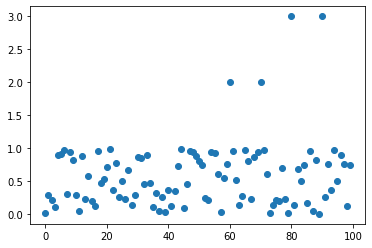

In [63]:
plt.scatter(x,y)

# Deteksi Outlier

## K-Means Euclid

In [64]:
def pusat_klaster_awal(y):
    n=len(y)
    list_1=np.arange(0,n)
    pusat_klaster_index = random.choices(list_1)
    pusat_klaster=y[pusat_klaster_index]
    return (pusat_klaster)

pusat_klaster_0=pusat_klaster_awal(y)
pusat_klaster_0

array([0.88483905])

In [65]:
def jarak_euclidean(x,y):
  return np.sqrt(sum(pow(a-b, 2) for a, b in zip(x,y)))

print(jarak_euclidean([0], [7]))

7.0


In [66]:
def jarak_centroid_euclidean(y,pusat_klaster):
  n=len(y)
  jarak=[]
  for i in range(n):
    x = y[i]
    jrk = float(jarak_euclidean([x], [pusat_klaster]))
    jarak.append(jrk)
  return jarak
jc=jarak_centroid_euclidean(y,pusat_klaster_0)
print(jc)

[0.8688794089780619, 0.6004552476334158, 0.6696839226301535, 0.7837134663284513, 0.01463446477209518, 0.02640337203594656, 0.0901902174095559, 0.5836809088217884, 0.05899811135289457, 0.05828482568238391, 0.6002556714074524, 0.8370198891432861, 0.002746435009165049, 0.6559226506920386, 0.2989529493609473, 0.6792219813342204, 0.7553554923635807, 0.06624431143897447, 0.4141764337788647, 0.3558653265377917, 0.16667812801083137, 0.10158151523906966, 0.5197658960400197, 0.11253038138708116, 0.6182848886358824, 0.3763623605217602, 0.658488435647081, 0.21614358054332183, 0.7475283968925016, 0.6012299082108885, 0.020196614852277195, 0.037241558139257336, 0.4331800481810898, 0.009063875521047704, 0.40669573157876904, 0.7818572683104625, 0.5643809195029476, 0.8318804500505322, 0.6275860893665478, 0.8567609216679336, 0.5217113444167841, 0.7681076884753715, 0.5313981097356286, 0.153480191424186, 0.0988171370486558, 0.7918029169599081, 0.43227257499360294, 0.07100472518727119, 0.061678186678508995,

In [67]:
def menghitung_pusat_klaster(y):
    pusat_klaster_baru=sum(y) / len(y)
    return pusat_klaster_baru

pusat_klaster_1=menghitung_pusat_klaster(y)
pusat_klaster_1

0.5898917599254802

In [71]:
jarak=jarak_centroid_euclidean(y,pusat_klaster_1)
#print(jarak)
dict1={"data":y, "jarak":jarak}
df=pd.DataFrame(dict1)
id1=df['jarak'].idxmax()
id2=df['jarak'].idxmin()
th=(jarak[id1]-jarak[id2])/2
odf=df[df.jarak>=th]
outlier=odf.iloc[0,0]
outlier

2.0

In [72]:
def outlier_KM_1D(y, pusat_klaster):
  jarak=jarak_centroid_euclidean(y,pusat_klaster)
  dict1={"data":y, "jarak":jarak}
  df=pd.DataFrame(dict1)
  id1=df['jarak'].idxmax()
  id2=df['jarak'].idxmin()
  th=(jarak[id1]-jarak[id2])/2
  odf=df[df.jarak>=th]
  outlier=odf.iloc[::,0]
  return outlier

outlier=outlier_KM_1D(y, pusat_klaster_1)
outlier

60    2.0
70    2.0
80    3.0
90    3.0
Name: data, dtype: float64

In [73]:
def K_Means_OD_Euc(y):
  pusat_klaster_0=pusat_klaster_awal(y)
  jc=jarak_centroid_euclidean(y,pusat_klaster_0)
  pusat_klaster_1=menghitung_pusat_klaster(y)
  outlier=outlier_KM_1D(y, pusat_klaster_1)
  return outlier

In [74]:
K_Means_OD_Euc(y)

60    2.0
70    2.0
80    3.0
90    3.0
Name: data, dtype: float64

## ESD Test
https://www.youtube.com/watch?v=KGWbbAUcC0I

In [75]:
def grubbs_stat(y):
    std_dev = np.std(y)
    avg_y = np.mean(y)
    abs_val_minus_avg = abs(y - avg_y)
    max_of_deviations = max(abs_val_minus_avg)
    max_ind = np.argmax(abs_val_minus_avg)
    Gcal = max_of_deviations/ std_dev
    print("Grubbs Statistics Value : {}".format(Gcal))
    return Gcal, max_ind

In [76]:
def calculate_critical_value(size, alpha):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    print("Grubbs Critical Value: {}".format(critical_value))
    return critical_value

In [77]:
def check_G_values(Gs, Gc, inp, max_index):
    if Gs > Gc:
        print('{} is an outlier. G > G-critical: {:.4f} > {:.4f} \n'.format(inp[max_index], Gs, Gc))
    else:
        print('{} is not an outlier. G > G-critical: {:.4f} > {:.4f} \n'.format(inp[max_index], Gs, Gc))

In [78]:
def ESD_Test(input_series, alpha, max_outliers):
    for iterations in range(max_outliers):
        Gcritical = calculate_critical_value(len(input_series), alpha)
        Gstat, max_index = grubbs_stat(input_series)
        check_G_values(Gstat, Gcritical, input_series, max_index)
        input_series = np.delete(input_series, max_index)

In [80]:
ESD_Test(y, 0.05, 4)

Grubbs Critical Value: 3.384082902288351
Grubbs Statistics Value : 4.669987516068832
3.0 is an outlier. G > G-critical: 4.6700 > 3.3841 

Grubbs Critical Value: 3.380650508067058
Grubbs Statistics Value : 5.31534889701734
3.0 is an outlier. G > G-critical: 5.3153 > 3.3807 

Grubbs Critical Value: 3.377175980782947
Grubbs Statistics Value : 3.757671089985892
2.0 is an outlier. G > G-critical: 3.7577 > 3.3772 

Grubbs Critical Value: 3.3736583400522497
Grubbs Statistics Value : 4.086082878675749
2.0 is an outlier. G > G-critical: 4.0861 > 3.3737 



## IQR

https://medium.com/@prashant.nair2050/hands-on-outlier-detection-and-treatment-in-python-using-1-5-iqr-rule-f9ff1961a414

In [82]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [83]:
lowerbound,upperbound = outlier_treatment(y)

In [87]:
outlier_IQR=y[(y < lowerbound) | (y > upperbound )]
outlier_IQR

array([2., 2., 3., 3.])